In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

DESCRIBE_PERCENTILES = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99]

In [2]:
mcu = pd.read_csv("./data/mcu.csv")
movies = pd.read_csv("./data/movies.csv")
characters = pd.read_csv("./data/characters.csv")

# Movies

In [3]:
movies

,movie,is transcript,lines,runtime min,url,words,year,characters
0,Iron Man,False,834,126,https://www.scriptslug.com/assets/uploads/scripts/iron-man-2008.pdf,10004,2008,37
1,Iron Man 2,True,1010,124,https://transcripts.fandom.com/wiki/Iron_Man_2,11342,2010,42
2,Thor,False,1007,114,https://www.scriptslug.com/assets/uploads/scripts/thor-2011.pdf,9299,2011,39
3,Captain America: The First Avenger,True,688,124,https://transcripts.fandom.com/wiki/Captain_America:_The_First_Avenger,7482,2011,70
4,The Avengers,False,1027,143,https://www.scriptslug.com/assets/uploads/scripts/the-avengers-2012.pdf,10643,2012,54
5,Iron Man 3,True,1043,131,https://transcripts.fandom.com/wiki/Iron_Man_3,10875,2013,57
6,Thor: The Dark World,True,734,112,https://transcripts.fandom.com/wiki/Thor:_The_Dark_World,7418,2013,41
7,Captain America: The Winter Soldier,True,841,136,https://transcripts.fandom.com/wiki/Captain_America:_The_Winter_Soldier,8696,2014,65
8,Ant-Man,True,867,117,https://transcripts.fandom.com/wiki/Ant-Man,9335,2015,33
9,Avengers: Age of Ultron,True,980,141,https://transcripts.fandom.com/wiki/Avengers:_Age_of_Ultron,10405,2015,38


In [4]:
profile = ProfileReport(movies, title="Movies", progress_bar=False)
   
profile
profile.to_widgets()

In [5]:
movies.describe(percentiles = DESCRIBE_PERCENTILES)

,lines,runtime min,words,year,characters
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,964.333333,133.500000,9619.555556,2014.611111,49.777778
std,197.436513,15.912444,1511.684577,3.292396,14.293378
min,688.000000,112.000000,7137.000000,2008.000000,33.000000
50%,983.500000,132.000000,9649.500000,2015.000000,46.500000
60%,990.600000,134.400000,10084.200000,2016.200000,51.600000
70%,1005.600000,136.900000,10570.600000,2017.000000,54.000000
80%,1020.200000,142.200000,10782.200000,2017.600000,61.800000
90%,1098.800000,147.600000,11442.500000,2018.300000,70.000000
95%,1278.350000,153.800000,11757.550000,2019.000000,71.800000


In [6]:
movies.corr(method="pearson")

,is transcript,lines,runtime min,words,year,characters
is transcript,1.000000,-0.079983,-0.224765,-0.101240,0.009894,0.200545
lines,-0.079983,1.000000,0.447997,0.835425,0.281009,0.456832
runtime min,-0.224765,0.447997,1.000000,0.470156,0.500207,0.408894
words,-0.101240,0.835425,0.470156,1.000000,-0.055007,0.230410
year,0.009894,0.281009,0.500207,-0.055007,1.000000,0.178053
characters,0.200545,0.456832,0.408894,0.230410,0.178053,1.000000


# Dialogue

### Words per line

,words
count,15724.000000
mean,11.011956
std,14.273662
min,1.000000
50%,7.000000
60%,9.000000
70%,11.000000
80%,15.400000
90%,23.000000
95%,33.000000


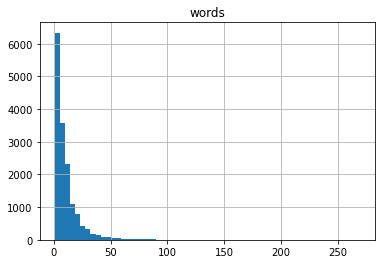

In [7]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe(percentiles = DESCRIBE_PERCENTILES)

# Characters

In [8]:
characters

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,173,137,119,0,165,0,0,0,...,74,152,0,0,0,1788,22590,9,12,198
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,...,7,121,0,0,0,977,8653,10,8,97
2,THOR,0,55,70,74,0,0,0,0,0,...,0,47,166,289,133,863,9487,7,10,123
3,PETER PARKER,0,0,7,39,0,73,0,0,0,...,402,0,0,0,0,551,5517,4,10,137
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,...,0,97,0,1,0,498,4689,10,9,49
5,PEPPER POTTS,0,0,15,21,0,0,0,0,0,...,7,29,0,0,0,442,3492,7,7,63
6,BRUCE BANNER,0,83,93,45,0,0,0,0,2,...,0,84,0,62,0,379,3840,7,10,54
7,NICK FURY,0,26,0,7,0,0,5,68,120,...,0,109,0,0,0,366,4524,7,12,52
8,LOKI,0,0,1,6,0,0,0,0,0,...,0,68,91,74,76,327,4097,6,12,54
9,SCOTT LANG,222,0,70,0,0,22,0,0,0,...,0,0,0,0,0,324,3236,3,9,108


In [9]:
profile = ProfileReport(characters, title="Characters", progress_bar=False)
   
profile
profile.to_widgets()

In [10]:
characters.describe(percentiles = DESCRIBE_PERCENTILES)

,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Guardians of the Galaxy Vol. 2,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,...,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,1.243865,1.472393,1.648773,1.427914,1.062883,1.417178,1.030675,1.219325,1.056748,1.222393,...,1.946319,1.452454,1.283742,1.207055,1.009202,24.116564,265.570552,1.374233,10.243865,9.763804
std,11.810604,11.031202,10.097267,8.424747,7.833367,10.542615,8.793884,10.708083,10.376396,10.845285,...,17.914420,10.929851,10.198830,12.675257,8.252723,100.968073,1155.743539,1.168380,15.399754,19.432092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,22.000000,1.000000,7.000000,2.000000
60%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,37.000000,1.000000,9.000000,3.000000
70%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,65.000000,1.000000,10.000000,5.000000
80%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.800000,150.000000,1.000000,13.000000,11.000000
90%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,53.000000,620.700000,2.000000,18.000000,25.900000
95%,0.450000,1.000000,4.000000,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,...,3.450000,1.000000,1.000000,1.000000,1.450000,93.450000,1183.150000,3.000000,23.450000,52.000000


## Regression Between Avg Words Per Line and Line Count

I wonder if there's a noticeable correlation between a character's `avg words per line` and their number of `total lines`.  
**In other words, do characters with more lines have longer lines?**

Let's start by inspecting the correlation between our useful features.  Some of these will be highly correlated because they are calculated using each other.

In [11]:
characters[["total lines", "total words", "avg words per line", "movie appearances", "avg lines per movie"]].corr(method="pearson")

,total lines,total words,avg words per line,movie appearances,avg lines per movie
total lines,1.000000,0.984897,0.003469,0.681068,0.759773
total words,0.984897,1.000000,0.035196,0.633225,0.755372
avg words per line,0.003469,0.035196,1.000000,-0.009263,0.026546
movie appearances,0.681068,0.633225,-0.009263,1.000000,0.464105
avg lines per movie,0.759773,0.755372,0.026546,0.464105,1.000000


Now let's create a regression model using `total lines` and `avg words per line`.

### Model 1 (total lines)

In [12]:
model_1 = smf.ols('characters["avg words per line"] ~ characters["total lines"]', data=characters).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     characters["avg words per line"]   R-squared:                       0.000
Model:                                          OLS   Adj. R-squared:                 -0.002
Method:                               Least Squares   F-statistic:                  0.007822
Date:                              Fri, 15 Jan 2021   Prob (F-statistic):              0.930
Time:                                      17:03:05   Log-Likelihood:                -2707.4
No. Observations:                               652   AIC:                             5419.
Df Residuals:                                   650   BIC:                             5428.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.2311      0.621     16.487      0.000       9.013      11.450
characters["total lines"]     0.0005      0.006      0.088      0.930      -0.011       0.012
==============================================================================
Omnibus:                     1008.119   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319472.488
Skew:                           8.888   Prob(JB):                         0.00
Kurtosis:                     109.975   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Plot

(-5.0, 120.0)

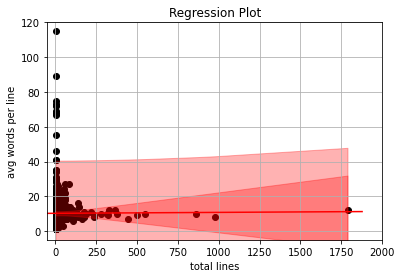

In [13]:
def abline(intercept, slope, col):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color=col)
    

plt.scatter(x = characters['total lines'].to_numpy(),
            y = characters['avg words per line'].to_numpy(),
            color='black')

abline(model_1.params[0], model_1.params[1], 'red')

conf_pred_intervals = model_1.get_prediction(characters['total lines']).summary_frame()

plt.fill_between(characters['total lines'], conf_pred_intervals['mean_ci_lower'], conf_pred_intervals['mean_ci_upper'], alpha=0.3, color='red')
plt.fill_between(characters['total lines'], conf_pred_intervals['obs_ci_lower'], conf_pred_intervals['obs_ci_upper'], alpha=0.3, color='red')

plt.grid()
plt.title("Regression Plot")
plt.xlabel('total lines')
plt.ylabel('avg words per line')
plt.xlim(-50,2000)
plt.ylim(-5,120)

### Residual Plot

Text(0, 0.5, 'residual')

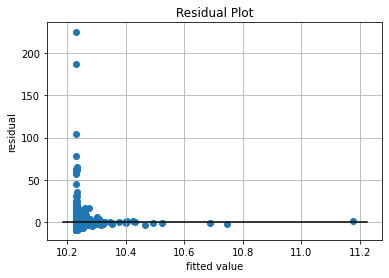

In [14]:
plt.scatter(x = model_1.fittedvalues, y = model_1.resid)
abline(0,0,'black')
plt.grid()
plt.title("Residual Plot")
plt.xlabel('fitted value')
plt.ylabel('residual')

### QQ Plot

Text(0.5, 1.0, 'QQ Plot')

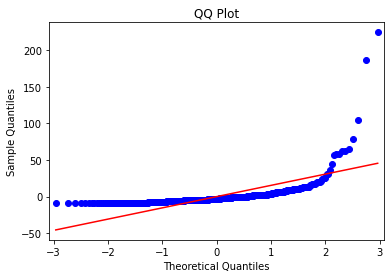

In [15]:
qqplot(model_1.resid, fit=False, line='s')
plt.title("QQ Plot")

### Identifying Influential Characters

In [16]:
influence_table = OLSInfluence(model_1).summary_frame()

dfbcutoff = 2 / math.sqrt(characters.shape[0])
influence_table[influence_table['dfb_characters["total lines"]'].abs() > dfbcutoff]
influence_table[influence_table['dfb_Intercept'].abs() > dfbcutoff]

#cooks_d_cutoff = 1
#influence_table[influence_table['cooks_d'].abs() > cooks_d_cutoff]

#influence_table

,dfb_Intercept,"dfb_characters[""total lines""]",cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
236,0.093075,-0.018213,0.004308,2.322637,0.001595,0.092826,2.330541,0.093142
237,0.079977,-0.015650,0.003188,1.997945,0.001595,0.079849,2.002566,0.080034
336,0.170947,-0.036611,0.014241,4.205946,0.001607,0.168765,4.261093,0.170977
337,0.162823,-0.034871,0.012952,4.011130,0.001607,0.160947,4.058588,0.162852
435,0.715264,-0.159752,0.172237,14.596241,0.001614,0.586920,17.788840,0.715295
436,0.554000,-0.123735,0.118922,12.128558,0.001614,0.487693,13.778169,0.554025
437,0.283637,-0.063349,0.037421,6.803557,0.001614,0.273573,7.054132,0.283649
438,0.209780,-0.046854,0.021152,5.115142,0.001614,0.205682,5.217291,0.209789
439,0.165903,-0.037054,0.013432,4.076117,0.001614,0.163902,4.126055,0.165910
440,0.155080,-0.034637,0.011775,3.816361,0.001614,0.153457,3.856880,0.155086


### Model 2 (log of total lines)

In [17]:
model_2 = smf.ols('characters["avg words per line"] ~ np.log(characters["total lines"])', data=characters).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     characters["avg words per line"]   R-squared:                       0.000
Model:                                          OLS   Adj. R-squared:                 -0.002
Method:                               Least Squares   F-statistic:                 0.0001737
Date:                              Fri, 15 Jan 2021   Prob (F-statistic):              0.989
Time:                                      17:03:06   Log-Likelihood:                -2707.4
No. Observations:                               652   AIC:                             5419.
Df Residuals:                                   650   BIC:                             5428.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            10.2366      0.820     12.487      0.000       8.627      11.846
np.log(characters["total lines"])     0.0051      0.391      0.013      0.989      -0.762       0.772
==============================================================================
Omnibus:                     1008.048   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319387.809
Skew:                           8.887   Prob(JB):                         0.00
Kurtosis:                     109.961   Cond. No.                         3.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Plot

Text(0, 0.5, 'avg words per line')

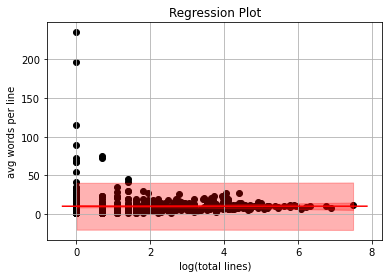

In [18]:
def abline(intercept, slope, col):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color=col)
    

plt.scatter(x = np.log(characters['total lines'].to_numpy()),
            y = characters['avg words per line'].to_numpy(),
            color='black')

abline(model_2.params[0], model_2.params[1], 'red')

conf_pred_intervals = model_2.get_prediction(np.log(characters['total lines'])).summary_frame()

plt.fill_between(np.log(characters['total lines']), conf_pred_intervals['mean_ci_lower'], conf_pred_intervals['mean_ci_upper'], alpha=0.3, color='red')
plt.fill_between(np.log(characters['total lines']), conf_pred_intervals['obs_ci_lower'], conf_pred_intervals['obs_ci_upper'], alpha=0.3, color='red')

plt.grid()
plt.title("Regression Plot")
plt.xlabel('log(total lines)')
plt.ylabel('avg words per line')

### Residual Plot

Text(0, 0.5, 'residual')

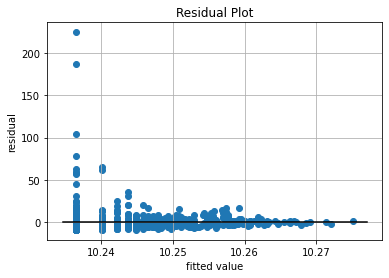

In [19]:
plt.scatter(x = model_2.fittedvalues, y = model_2.resid)
abline(0,0,'black')
plt.grid()
plt.title("Residual Plot")
plt.xlabel('fitted value')
plt.ylabel('residual')

### QQ Plot

Text(0.5, 1.0, 'QQ Plot')

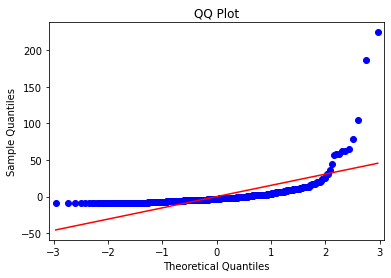

In [20]:
qqplot(model_2.resid, fit=False, line='s')
plt.title("QQ Plot")

### Identifying Influential Characters

In [21]:
influence_table = OLSInfluence(model_2).summary_frame()

dfbcutoff = 2 / math.sqrt(characters.shape[0])
influence_table[influence_table['dfb_np.log(characters["total lines"])'].abs() > dfbcutoff]
influence_table[influence_table['dfb_Intercept'].abs() > dfbcutoff]

#cooks_d_cutoff = 1
#influence_table[influence_table['cooks_d'].abs() > cooks_d_cutoff]

#influence_table

,dfb_Intercept,"dfb_np.log(characters[""total lines""])",cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
336,0.176171,-0.078604,0.016601,4.205965,0.001873,0.182216,4.261113,0.184605
337,0.167798,-0.074868,0.015099,4.011124,0.001873,0.173775,4.058582,0.175831
435,0.948401,-0.641797,0.302618,14.604727,0.002829,0.777969,17.804230,0.948401
436,0.734487,-0.497038,0.208943,12.135555,0.002829,0.646440,13.788445,0.734487
437,0.375987,-0.254436,0.065745,6.807341,0.002829,0.362615,7.058357,0.375987
438,0.278073,-0.188176,0.037161,5.117908,0.002829,0.272622,5.220230,0.278073
439,0.219906,-0.148814,0.023597,4.078256,0.002829,0.217242,4.128277,0.219906
440,0.205559,-0.139104,0.020685,3.818344,0.002829,0.203397,3.858929,0.205559
441,0.201982,-0.136684,0.019987,3.753365,0.002829,0.199935,3.791793,0.201982
442,0.198410,-0.134267,0.019301,3.688387,0.002829,0.196474,3.724733,0.198410


### Conclusion

Using a t test and a confidence level of 95% (α=0.05), we **fail to reject** the null hypothesis that there is no relationship between the number of lines a character has and the average length of their lines (t=0.088, p=0.930).

Using a t test and a confidence level of 95% (α=0.05), we also **fail to reject** the null hypothesis that there is no relationship between the **logarithm** of the number of lines a character has and the average length of their lines (t=0.013, p=0.989).

In other words, there is no evidence that having more lines means a character will have longer lines.


However, the residual and QQ plots show that there might be a violation in the normaility of the errros and the linearity of the data.  These two models also identify, but does not remove, several influential characters.  Typically these are characters with very few (usually 1) line.